# Renewal process
___

Let $(\xi_i)$ be independent and identically distrubuted such that $\xi_i > 0$ and $F$ be its distribution function.
Define 
$$T_k = \sum_{i=1}^k \xi_i,$$
$$N_x = \sup \{ n \ge 0 \mid T_n \ge x\}, \,\, x \ge 0.$$
We call $N_x$ a renewal process.

Note that a renewal process is not a markov process in general.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set()

In [5]:
def renewal_process(xis):
    xs = [0]
    ys = [0]
    tk = np.cumsum(xis)
    for i, xi in enumerate(tk):
        xs += [xi, xi]
        ys += [i, i+1]
    return xs, ys

def get_nx(xis, x):
    tk = np.cumsum(xis)
    i = np.searchsort(tk, x, side="right")
    return i

### Example 1
$P(\xi_i = 1) = 1.$

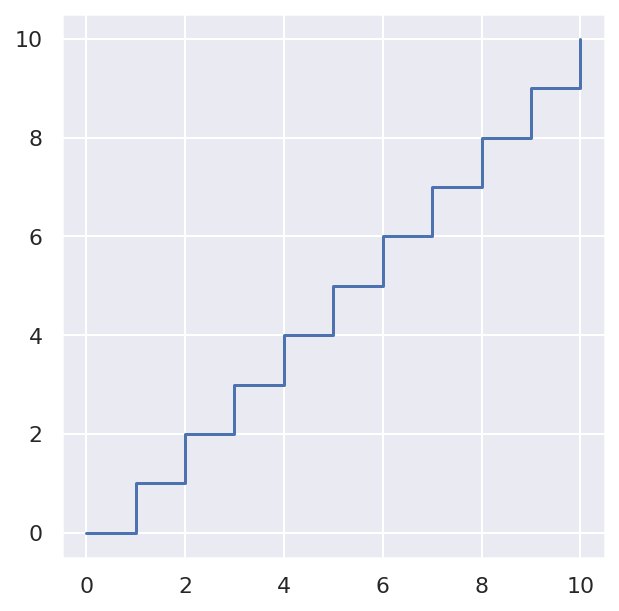

In [22]:
xi_num = 10
num = 1

xis = np.ones(xi_num)
xs, ys = renewal_process(xis)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal')
plt.plot(xs, ys)
plt.show()

### Example 2
If $\xi_i$ is exponentially distributed with parameter $\lambda > 0$, then $N_x$ is a Poisson process with parameter $\lambda$.

Now we set $\lambda = 1$.

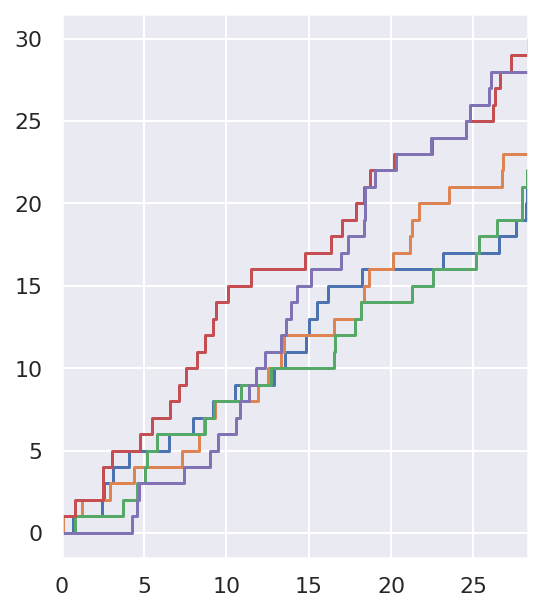

In [23]:
xi_num = 30
num = 5

x_min = 1e+6
plt.figure(figsize=(10, 5))
plt.axes().set_aspect('equal')
for _ in range(num):
    xis = np.random.exponential(size=xi_num)
    xs, ys = renewal_process(xis)
    x_min = min(xs[-1], x_min)
    plt.plot(xs, ys)
plt.xlim(0, x_min)
plt.show()

### Example 3
$\xi_i = B/6 + U + 10I$, where $B$ is a binomial distribution with parameter $p = 4/5, n = 30$, $U$ is uniformly distributed on $[0, 1]$ and $P(I = 0) = P(I = 1) = 1/2$.

Define $\mu = E\xi_i = 10$.

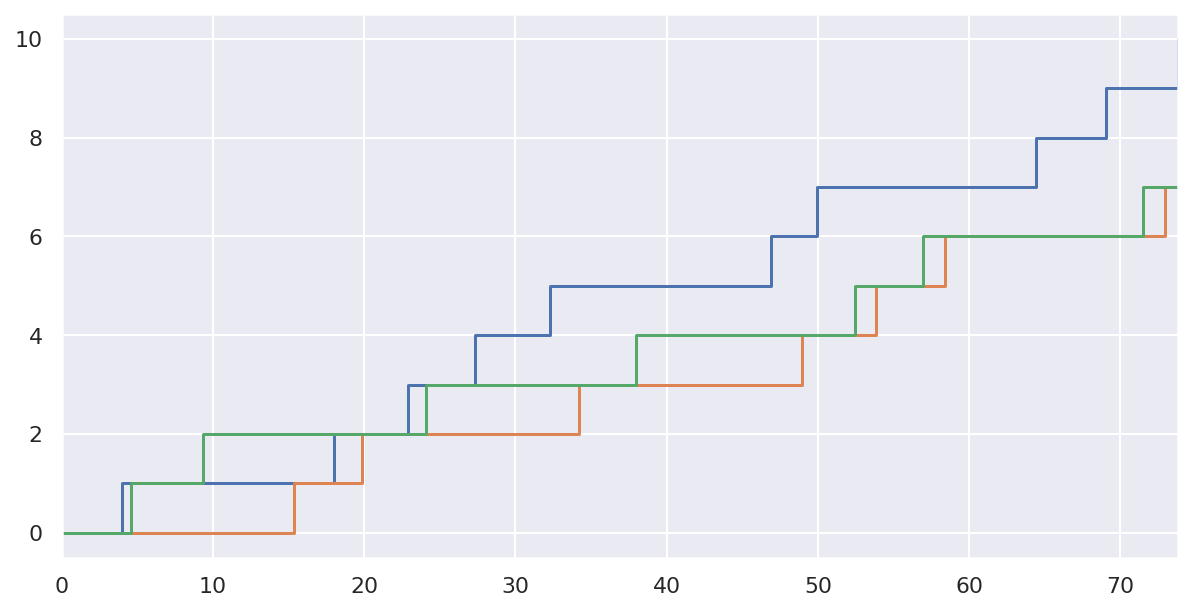

In [32]:
xi_num = 10
num = 3

x_min = 1e+6
plt.figure(figsize=(10, 5))
for _ in range(num):
    xis = np.random.binomial(n=30, p=4/5, size=xi_num) / 6 + np.random.rand(xi_num) + (np.random.rand(xi_num) < 1/2) * 10
    xs, ys = renewal_process(xis)
    x_min = min(xs[-1], x_min)
    plt.plot(xs, ys)
plt.xlim(0, x_min)
plt.show()

## Path property
___

> **Theorem**
> $$ \lim_{x \uparrow \infty} \frac{N_x}{x} = \frac{1}{\mu}.$$  
> If $\mu =\infty$, $1/\mu = 0.$

Define a renewal function $U(x)$ such that
$$U(x) = \sum_{k=0}^\infty F^{*k}(x) = EN_x + 1.$$

## Elementary Renewal Theorem
___

> **Theorem**
> $$\lim_{x \uparrow \infty} \frac{U(x)}{x} = \frac{1}{\mu}.$$
> And the rate of convergence is
> $$\frac{U(x)}{x} - \frac{1}{\mu} \sim \frac{E \xi^2}{2\mu^2 x}  \;\;\;\;\; x\uparrow \infty.$$